### 1. Problem Statement

Cardiovascular diseases are the leading cause of death globally. It is therefore necessary to identify the causes and develop a system to predict heart attacks in an effective manner. The dataset has the information about the factors that might have an impact on cardiovascular health. The target field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease. Attribute information is described below:

#### Data Dictionary

1. `age` - age in years
2. `sex` - (1 = male; 0 = female)
3. `cp` - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. `trestbps` - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. `chol` - serum cholestoral in mg/dl
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. `fbs` - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    * '>126' mg/dL signals diabetes
7. `restecg` - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        * can range from mild symptoms to severe problems
        * signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        * Enlarged heart's main pumping chamber
8. `thalach` - maximum heart rate achieved
9. `exang` - exercise induced angina (1 = yes; 0 = no)
10. `oldpeak` - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. `slope` - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. `ca` - number of major vessels (0-4) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. `thal` - thalium stress result
    * 0,1: normal
    * 2: fixed defect: used to be defect but ok now
    * 3: reversable defect: no proper blood movement when excercising
14. `target` - have disease or not (1=yes, 0=no) (= the predicted attribute)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### 2. Data Extraction

In [2]:
df=pd.read_excel('clinical_dataset.xlsx')
df.shape

(303, 14)

The dataset contains **303** rows and **14** features (columns).

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Dataset has 13 features and 1 **target** variable

### 3. Exploratory Data Analysis (EDA)

#### 3.1 Preliminary data inspection on data structure, missing values, duplicates etc.

In [4]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


All the features are in numerical datatypes, though some may be ordinal features.

In [5]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

No missing values in the dataset

In [6]:
df.duplicated().sort_values()

0      False
205    False
204    False
203    False
202    False
       ...  
97     False
96     False
102    False
302    False
164     True
Length: 303, dtype: bool

row 164 is duplicated which we will remove

In [7]:
df.drop_duplicates(inplace=True)
df.duplicated().any()

False

No duplicated values now!

#### 3.2 Statistical summary, measures of central tendencies and spread of the data

In [8]:
df.describe(include='all')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#### 3.3 Categorical variables

In [9]:
cat_val = []
num_val = []
for col in df.columns:
    if df[col].nunique() <= 10:
        cat_val.append(col)
    else:
        num_val.append(col)
cat_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

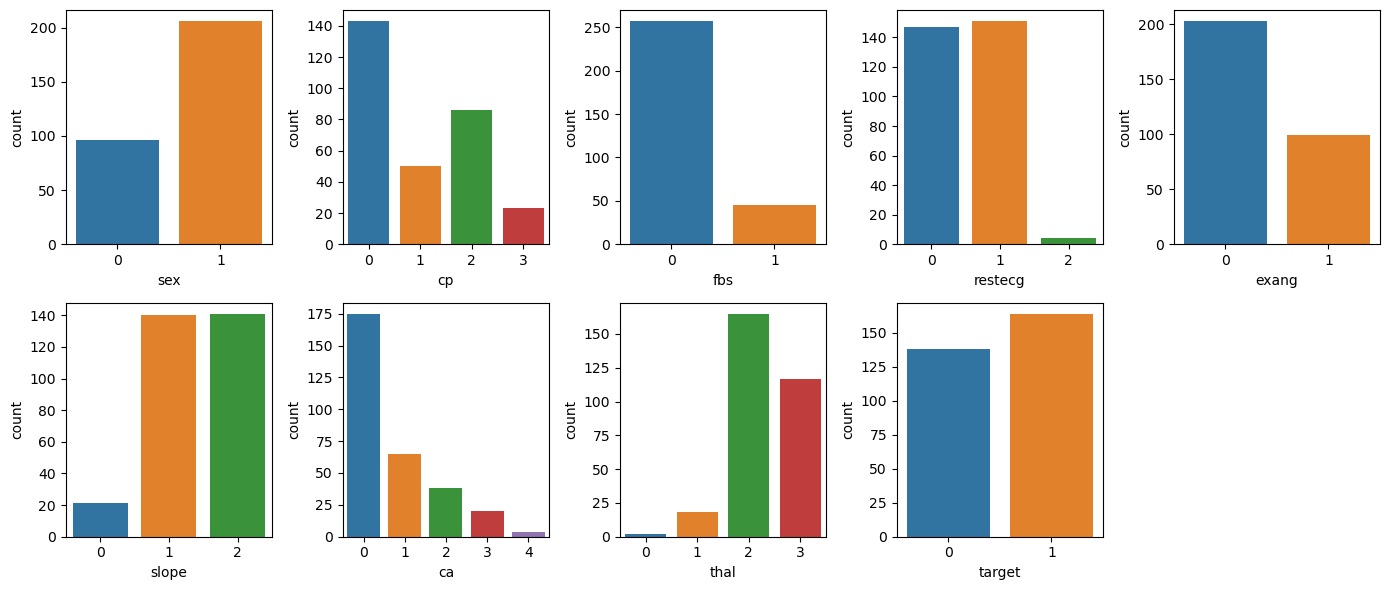

In [10]:
plt.figure(figsize=(14,6))
for i, col in enumerate(cat_val):
    plt.subplot(2,5,i+1)
    sns.countplot(data=df, x=col)
    plt.tight_layout()

Target variable is almost balanced. However, there is severe imbalance in other categorical features. For example, there are twice number of male than female in the dataset. 

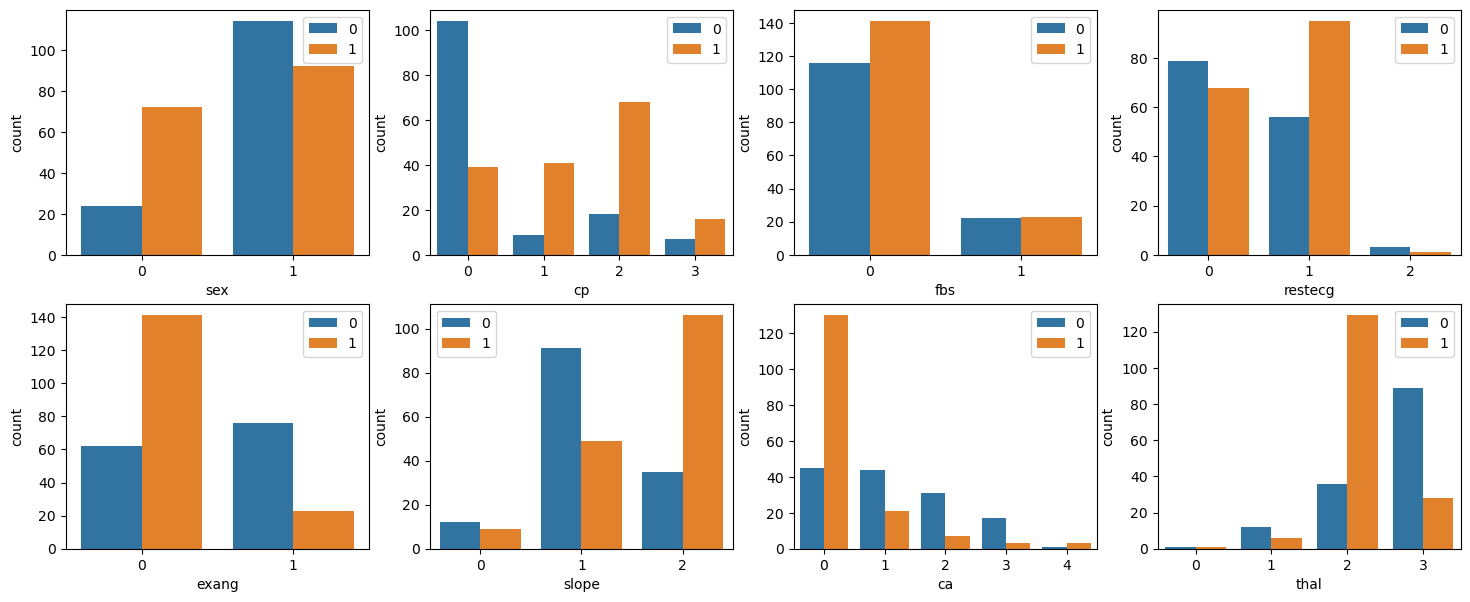

In [11]:
plt.figure(figsize=(18, 7))
for i, col in enumerate(cat_val, 1):
    if col=='target':
        continue
    plt.subplot(2, 4, i)
    sns.countplot(data=df, x=col, hue='target')
    plt.legend()
    plt.xlabel(col)

- **sex**: Although female samples are much less than male samples, the percentage of female with heart disease is about 67%, while the percentage is less than 50% for male.
- **cp {Chest Pain}**: People with chest pain types 1, 2, 3 are more likely to have heart disease than people with chest pain type 0.
- **fbs {Fasting Blood Sugar}**: People with fbs less than 120mg shows a little bit higher chance to have heart disease comparing to people with fbs greater than 120mg.
- **restecg {resting electrocardiographic results}**: People with value 1 (signals non-normal heart beat, can range from mild symptoms to severe problems) are more likely to have heart disease.
- **exang {exercise induced angina}**: People with value 0 (No ==> exercice induced angina) have heart disease more than people with value 1 (Yes ==> exercice induced angina)
- **slope {slope of the peak exercise ST segment}**: People with slope value equal to 2 (Downslopins: signs of unhealthy heart) are more likely to have heart disease than people with slope value equal to 0 (Upsloping: better heart rate with excercise) or 1 (Flatsloping: minimal change (typical healthy heart)).
- **ca {number of major vessels (0-4) colored by flourosopy}**: the more blood movement the better so people with ca equal to 0 are more likely to have heart disease.
- **thal {thalium stress result}**: People with thal value equal to 2 (fixed defect: used to be defect but ok now) are more likely to have heart disease.

In [12]:
## Creating an empty variable and picking only the p value from the output of Chi-Square test
cat_corr = []
for col in cat_val:
    if col=='target':
        continue
    cat_corr.append((col, list(ss.chi2_contingency(pd.crosstab(
                 df[col], df['target'])))[1]))
cat_corr.sort(key=lambda x:x[1])
cat_corr

[('thal', 3.146295138318122e-18),
 ('cp', 1.8926838351935918e-17),
 ('ca', 3.771038067427657e-15),
 ('exang', 9.556466486179178e-14),
 ('slope', 6.577782760917924e-11),
 ('sex', 1.5508552054949547e-06),
 ('restecg', 0.007713053269318974),
 ('fbs', 0.7611374700928197)]

From chi-square test, we can see that thal, cp, ca, exang and slope have very strong correlation with target variable, while the rest have a little or no correlations.

#### 3.4 Numerical variables

In [13]:
d = {'mean': df[num_val].mean(),
     'median': df[num_val].median(),
     'skew': df[num_val].skew()}

df2 = pd.DataFrame(d)

df2.sort_values(by='skew', key=lambda x:-abs(x))

,mean,median,skew
oldpeak,1.043046,0.8,1.266173
chol,246.500000,240.5,1.147332
trestbps,131.602649,130.0,0.716541
thalach,149.569536,152.5,-0.532671
age,54.420530,55.5,-0.203743


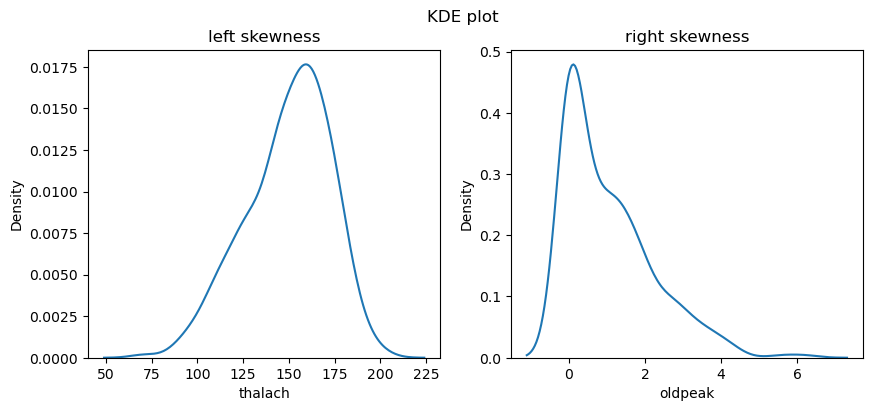

In [14]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
#left skewness
sns.kdeplot(df['thalach'])
plt.title('left skewness')
plt.subplot(1,2,2)
#right skewness
sns.kdeplot(df['oldpeak'])
plt.title('right skewness')
#plt.legend()
plt.suptitle('KDE plot')
plt.show()

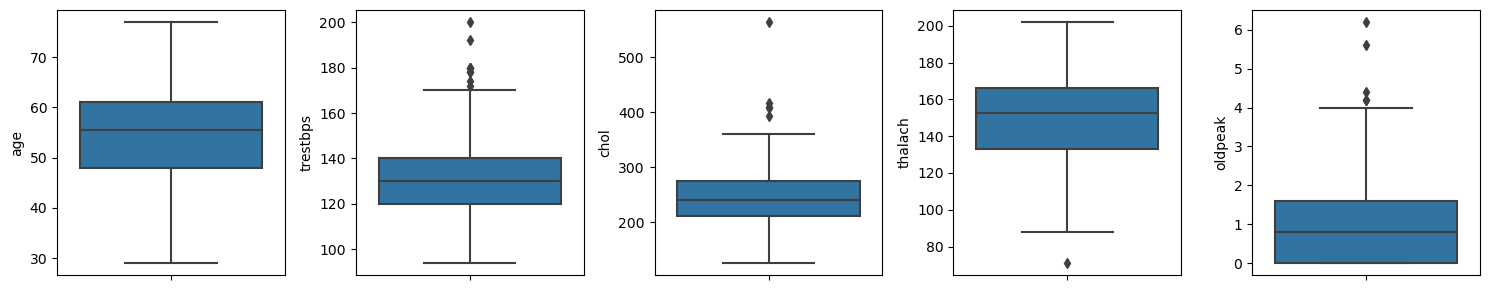

In [15]:
plt.figure(figsize=(15,3))
plt.subplot(151)
sns.boxplot(y=df[num_val[0]])
plt.subplot(152)
sns.boxplot(y=df[num_val[1]])
plt.subplot(153)
sns.boxplot(y=df[num_val[2]])
plt.subplot(154)
sns.boxplot(y=df[num_val[3]])
plt.subplot(155)
sns.boxplot(y=df[num_val[4]])
plt.tight_layout()
plt.show()

From above, we can see that trestbps, chol and oldpeak are strongly right-skewed and have outliers.

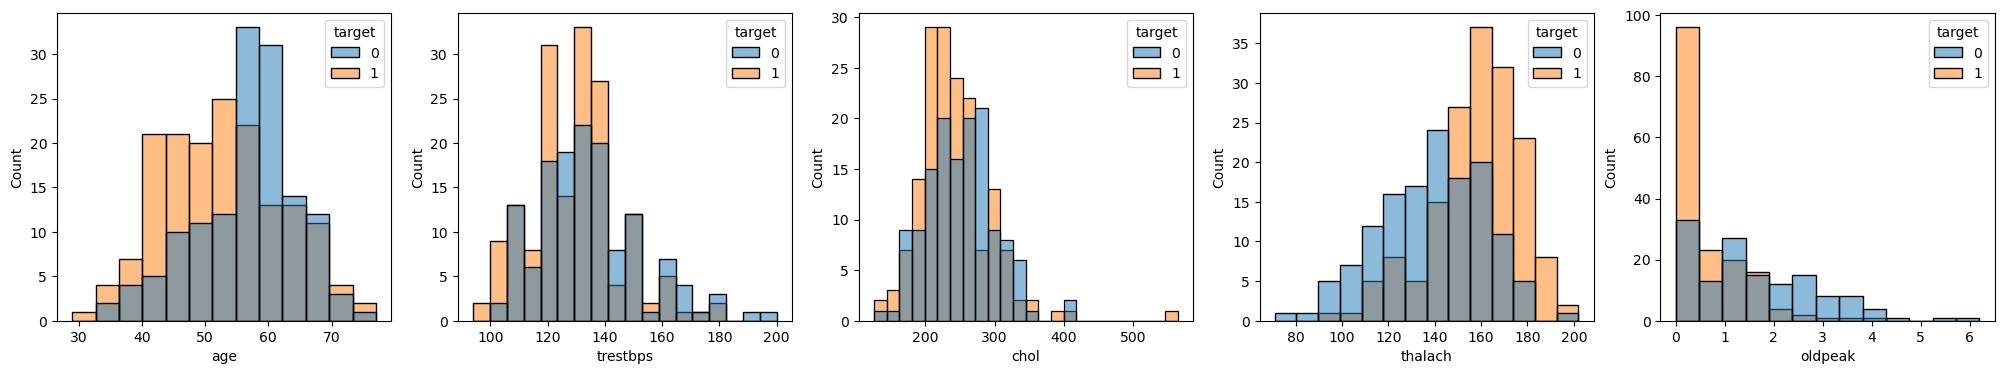

In [16]:
plt.figure(figsize=(25, 4))
for i, col in enumerate(num_val, 1):
    plt.subplot(1, 5, i)
    sns.histplot(data=df, x=col, hue='target')
    plt.xlabel(col)

- **age**: People with age<55 are more likely to have heart attacks, especially between 40-45
- **trestbps {resting blood pressure}**: People with resting blood pressure less than 140 have a higher chance of heart attacks.
- **chol {serum cholestoral}**: People who develop heart disease have much higher level of cholestral sometimes (e.g. >550) and most are concentrated in the range of 200-280.
- **thalach {maximum heart rate achieved}**: People with thalach higher than 150 have a higher chance of heart attacks.
- **oldpeak {ST depression induced by exercise relative to rest}**: oldpeak values less than 1 have a much higher change of heart attack.

In [17]:
num_corr = []
for col in num_val:
    num_corr.append((col, ss.f_oneway(df[col], df['target'])[1]))
num_corr.sort(key=lambda x:x[1])
num_corr

[('age', 0.0),
 ('trestbps', 0.0),
 ('chol', 0.0),
 ('thalach', 0.0),
 ('oldpeak', 1.5672835231798943e-11)]

ANOVA test shows that all the numerical variables are strongly correlated with the target variable.

### 4. Feature Engineering

In [18]:
y = df['target']
X = df.drop(columns=['target'])

from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.3,stratify=y,random_state=0)

In [19]:
from feature_engine.transformation import YeoJohnsonTransformer
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import StandardScaler

# Yeo-Johnson (exponential transformation with automatic search including negative values)
transformer = YeoJohnsonTransformer()

# Winsorizer() caps maximum and / or minimum values of a variable
capper = Winsorizer(capping_method='iqr', tail='both')

# Standardization
scaler = StandardScaler()

### 5. Feature Selection

In [20]:
from sklearn.feature_selection import SelectKBest, chi2

selector = SelectKBest(score_func=chi2, k=7)

In [21]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer

cat_val2 = [col for col in cat_val if col != 'target']

numeric_transformer = Pipeline(
    steps=[
           ("Transformer", transformer), 
           ('Capper', capper),
           ("Scaler", scaler)
          ]
)

categorical_transformer = selector

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_val),
        ("cat", categorical_transformer, cat_val2),
    ]
)

X_train_tr = preprocessor.fit_transform(X_train,y_train)
X_val_tr = preprocessor.transform(X_val)

In [22]:
preprocessor.get_feature_names_out()

array(['num__age', 'num__trestbps', 'num__chol', 'num__thalach',
       'num__oldpeak', 'cat__sex', 'cat__cp', 'cat__restecg',
       'cat__exang', 'cat__slope', 'cat__ca', 'cat__thal'], dtype=object)

We can see that the only unselected categorical variable is fbs, which is consistent with our chi-square test.

### 6. Model Selection

In [23]:
# Import algorithms to try
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from xgboost import XGBClassifier
import time
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score

In [24]:
# Define algorithms to try
algorithms = []
algorithms.append(('Logistic Regression', LogisticRegression()))
algorithms.append(('Linear SVM', SVC()))
algorithms.append(('Random Forest', RandomForestClassifier()))
algorithms.append(('Gaussian Process',  GaussianProcessClassifier()))
algorithms.append(('XGBoost',XGBClassifier()))


In [25]:
# Initialize lists
names = []
train_accuracy = []
test_accuracy = []
train_f1 = []
test_f1 = []
train_auc = []
test_auc = []
cross_validation_scores = []
runtime = []

# Iterate ofer each element in algorithms
for name, clf in algorithms:
  t1 = time.time()
  names.append(name)
  clf.fit(X_train_tr, y_train)

  train_accuracy.append(accuracy_score(y_train, clf.predict(X_train_tr)))
  test_accuracy.append(accuracy_score(y_val, clf.predict(X_val_tr)))
    
  train_f1.append(f1_score(y_train, clf.predict(X_train_tr)))
  test_f1.append(f1_score(y_val, clf.predict(X_val_tr)))
    
  train_auc.append(roc_auc_score(y_train, clf.predict(X_train_tr)))
  test_auc.append(roc_auc_score(y_val, clf.predict(X_val_tr)))
    
  result = cross_val_score(clf, np.vstack((X_train_tr, X_val_tr)), 
                           np.hstack((y_train, y_val)), cv=3, scoring='accuracy')

  cross_validation_scores.append(np.mean(result))
    
  t2 = time.time()
  runtime.append(t2-t1)

In [26]:
# Create comparison dataframe
model_comparison = pd.DataFrame({'Algorithm': names,
                                 'Train accuracy': train_accuracy,
                                 'Val accuracy': test_accuracy,
                                 'Train f1 score': train_f1,
                                 'Val f1 score': test_f1,
                                 'Train auc score': train_auc,
                                 'Val auc score': test_auc,
                                 'Cross val score': cross_validation_scores,
                                 'Runtime': runtime,})

# Sort by Test_RMSE
model_comparison.sort_values(by=['Cross val score'], ascending=False)

,Algorithm,Train accuracy,Val accuracy,Train f1 score,Val f1 score,Train auc score,Val auc score,Cross val score,Runtime
1,Linear SVM,0.872038,0.868132,0.890688,0.882353,0.863678,0.863946,0.831254,0.047031
0,Logistic Regression,0.810427,0.890110,0.834711,0.901961,0.803714,0.886054,0.821386,0.036002
2,Random Forest,1.000000,0.835165,1.000000,0.845361,1.000000,0.835034,0.811221,0.589967
4,XGBoost,1.000000,0.824176,1.000000,0.833333,1.000000,0.824830,0.798020,0.524002
3,Gaussian Process,0.995261,0.835165,0.995671,0.851485,0.994792,0.831633,0.794851,0.074000


### 7. Hyperparameter Tuning

In [27]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {"svc__C":(0.1, 0.5, 1, 2, 5, 10, 20), 
              "svc__gamma":(0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1), 
              "svc__kernel":('linear', 'poly', 'rbf')}

clf = SVC() 

full_pipe = make_pipeline(preprocessor,
                          clf
                         )

random_search = RandomizedSearchCV(full_pipe, param_grid, cv=3, n_iter=100, 
                                   scoring='accuracy', n_jobs=-1, verbose=1)


In [28]:
random_search.fit(X, y)
print("Best parameters:")
print(random_search.best_params_)
print("Best score:")
print(random_search.best_score_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters:
{'svc__kernel': 'rbf', 'svc__gamma': 0.001, 'svc__C': 20}
Best score:
0.8442244224422443


**Let's check if the test score will be different when keeping fbs in the input features.**

In [29]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_val),
      #  ("cat", categorical_transformer, cat_val2),
    ]
)

full_pipe = make_pipeline(preprocessor,
                          clf
                         )

random_search = RandomizedSearchCV(full_pipe, param_grid, cv=3, n_iter=100, 
                                   scoring='accuracy', n_jobs=-1, verbose=1)


In [30]:
random_search.fit(X, y)
print("Best parameters:")
print(random_search.best_params_)
print("Best score:")
print(random_search.best_score_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters:
{'svc__kernel': 'poly', 'svc__gamma': 0.1, 'svc__C': 10}
Best score:
0.7350825082508251


the score drops to 0.7383 when fbs is added back. We know from chi-square test that fbs is irrelevant, adding it to the input will degrade the model performance.

### Conclusion

This project aims to study the risk of heart disease based on patients' age, sex and other clinical parameters. Data preprocessing techniques such as standardization, transformation and winsorization are applied to numerical variables, and chi-square test is applied to select related categorical features. A number of ML models (LogisticRegression, SVC, RandomForest, GaussianProcess and XGBoost) are used as baseline models. Hyperparameters are fine tuned for SVC. The test accuracy is increased from 0.8313 to 0.8442. It is also shown that without feature selection, the test accuracy drops to 0.7383.